# **1. Dataset Introduction**

This dataset was obtained from Kaggle under the title **"Student Depression Dataset"**.
It contains essential information about university students and various factors that may influence their mental condition, particularly depression. This dataset is highly relevant for mental health prediction research as it includes demographic, academic, lifestyle, and psychological background factors.

* **Source**: [https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset](https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset)
* **Data Type**: Structured (CSV)
* **Target**: `Depression` column

**Feature Descriptions** in the dataset:

* **id**: Unique ID for each student
* **Gender, Age, City**: Demographic information
* **CGPA, Academic Pressure, Study Satisfaction**: Academic indicators
* **Work Pressure, Job Satisfaction, Work/Study Hours**: Professional and daily activity indicators
* **Sleep Duration, Dietary Habits**: Lifestyle factors influencing mental health
* **Have you ever had suicidal thoughts?**, **Family History of Mental Illness**: Psychological and genetic risk factors
* **Financial Stress**: Perceived financial pressure
* **Degree, Profession**: Educational or occupational information
* **Depression**: Target label indicating whether the student is experiencing depression

# **2. Import Library**

| **Library**    | **Function**                                                                             |
| -------------- | ---------------------------------------------------------------------------------------- |
| `pandas`       | Used for reading and manipulating tabular data (e.g., CSV files).                        |
| `numpy`        | Provides support for numerical operations, arrays, and mathematical tools.               |
| `matplotlib`   | Basic plotting library for creating visualizations like line charts, bars.               |
| `seaborn`      | Statistical visualization library built on top of matplotlib (e.g., heatmaps, boxplots). |
| `scikit-learn` | Provides preprocessing tools, machine learning models, and evaluation metrics.           |
| `joblib`       | Efficiently saves and loads Python objects like models, scalers, and encoders.           |
| `mlflow`       | Used to track experiments, log parameters and metrics, and deploy ML models.             |


In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn joblib mlflow

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/9c/b9/5cead4f63b6d31bdefeb21a679bc5a7f4aaf262ca7e07e2bc1c341b68470/pandas-2.2.3-cp39-cp39-macosx_11_0_arm64.whl.metadata
  Using cached pandas-2.2.3-cp39-cp39-macosx_11_0_arm64.whl.metadata (89 kB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/96/ff/06d1aa3eeb1c614eda245c1ba4fb88c483bee6520d361641331872ac4b82/numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/da/36/236fbd868b6c91309a5206bd90c3f881f4f44b2d997cd1d6239ef652f878/matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl.metadata
  Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (11 kB)
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d914498

In [2]:
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for creating basic plots and charts
import seaborn as sns  # for statistical data visualization
from sklearn.model_selection import train_test_split  # for splitting the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # for feature scaling and encoding categorical variables

# **3. Load Dataset**

In [4]:
# Load the dataset from the root directory
df = pd.read_csv("../student_depression_raw.csv")

# Show the first 5 rows to understand the structure
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


# **4. Exploratory Data Analysis (EDA)**

## Basic Data Overview

In [6]:
# Summary of dataset: data types and missing values
df.info()

# Statistical summary of numerical columns
df.describe()

# Count and show duplicated rows
print("Number of duplicated rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

 **Insights from Basic Data Overview**

1. **Dataset Size and Completeness**

   * The dataset contains **27,901 rows and 18 columns**, with **no missing values**.
   * This makes the dataset ready for analysis without requiring imputation or row removal for missing data.

2. **Feature Types**

   * There are **7 numeric (float64)** 
   * **2 integer (int64)** features: `id` and the target `Depression`,
   *  **9 categorical/object features** 

3. **Target Distribution (`Depression`)**

   * The `Depression` variable is binary (`0` or `1`).
   * From the statistical summary:

     * Mean = \~0.585 → about **58.5% of students are classified as depressed**.
     * Median (50%) = 1 → the majority class is "1" (Depressed).
     * This shows **class imbalance**, which may affect model performance and should be addressed later.

4. **Feature Observations**
   * `Age` ranges from 18 to 59, with a mean of \~25.8, indicating that the majority of the students are in typical university age.
   * `Academic Pressure`, `Study Satisfaction`, and `CGPA` are all numerical and seem to be rated on a scale:
     * `Academic Pressure` ranges from 0 to 5.
     * `Study Satisfaction` ranges from 0 to 5.
     * `CGPA` has a reasonable academic range: 0 to 10, with a mean \~7.65.
   * `Work Pressure` and `Job Satisfaction` have low variation (std \~0.04).
   * `Work/Study Hours` range from 0 to 12 hours, with an average of \~7.15 hours per day, which is reasonable.

5. No **duplicate data** found in the data.


## Distribution of Target Variable (Depression)

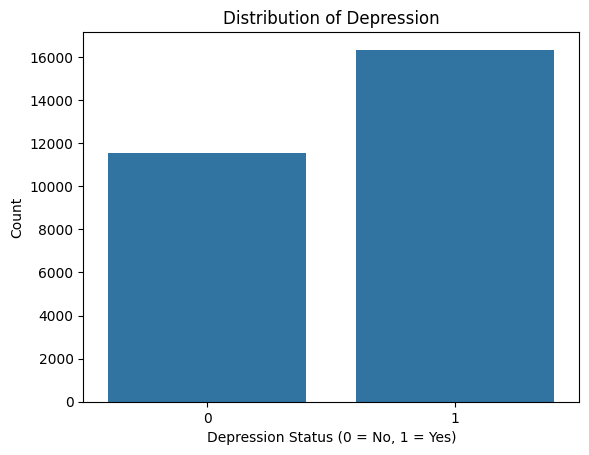

Percentage by class:
Depression
1    58.549873
0    41.450127
Name: proportion, dtype: float64


In [7]:
# Visualize the distribution of the target variable
sns.countplot(x='Depression', data=df)
plt.title('Distribution of Depression')
plt.xlabel('Depression Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Percentage distribution
print("Percentage by class:")
print(df['Depression'].value_counts(normalize=True) * 100)

From distribution of Depression, students are classified as *depressed*. The distribution bar chart also shows the potential of imbalance data.

## Correlation Matrix with Target

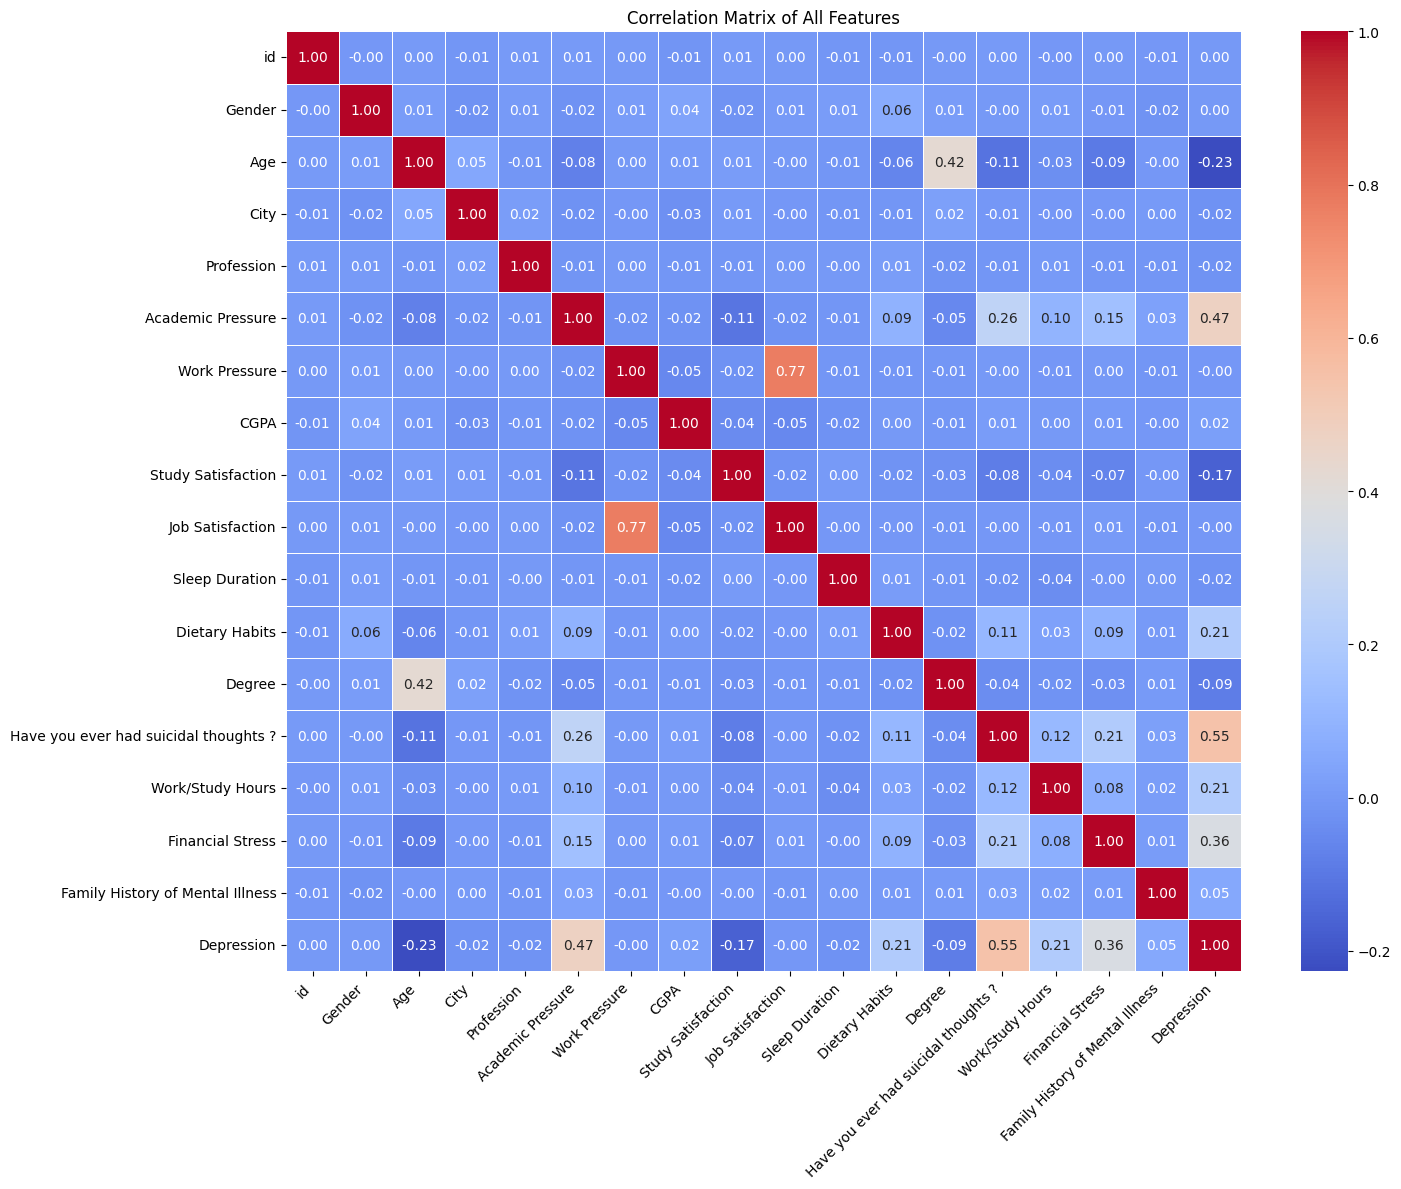

In [10]:
# Make a copy of the original dataframe
df_encoded = df.copy()

label_enc = LabelEncoder()

# Loop through all object columns and encode them
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of All Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

 **Top Features Associated with Student Depression**
 **Positively Associated Features**
1. **Have you ever had suicidal thoughts**
   → Students who have experienced suicidal ideation are much more likely to suffer from depression.

2. **Academic Pressure**
   → High academic demands and stress contribute significantly to depressive symptoms.

3. **Financial Stress**
   → Financial burdens are a strong factor influencing mental health and depression among students.

4. **Work/Study Hours**
   → Spending more hours on work or study may lead to burnout and increased risk of depression.

5. **Dietary Habits**
   → Poor or inconsistent eating habits are linked to worsened mental well-being.

---

 **Negatively Associated Features**

1. **Age**
   → Younger students tend to be more vulnerable to depression compared to older students.

2. **Study Satisfaction**
   → Students who are satisfied with their academic experience are less likely to be depressed.

3. **Degree**
   → Certain degrees or higher education levels may be associated with better coping mechanisms or support systems.

---

 **Key Insight**

> Student depression is most influenced by psychological indicators (such as suicidal thoughts), academic and financial stress, and lifestyle factors. Protective elements include personal satisfaction with studies, age-related maturity, and academic level.



## Detecting Outliers for Top Positive and Negative Associated Features

In [13]:
print(df_encoded['Dietary Habits'])

0        0
1        1
2        0
3        1
4        1
        ..
27896    3
27897    0
27898    3
27899    0
27900    0
Name: Dietary Habits, Length: 27901, dtype: int64


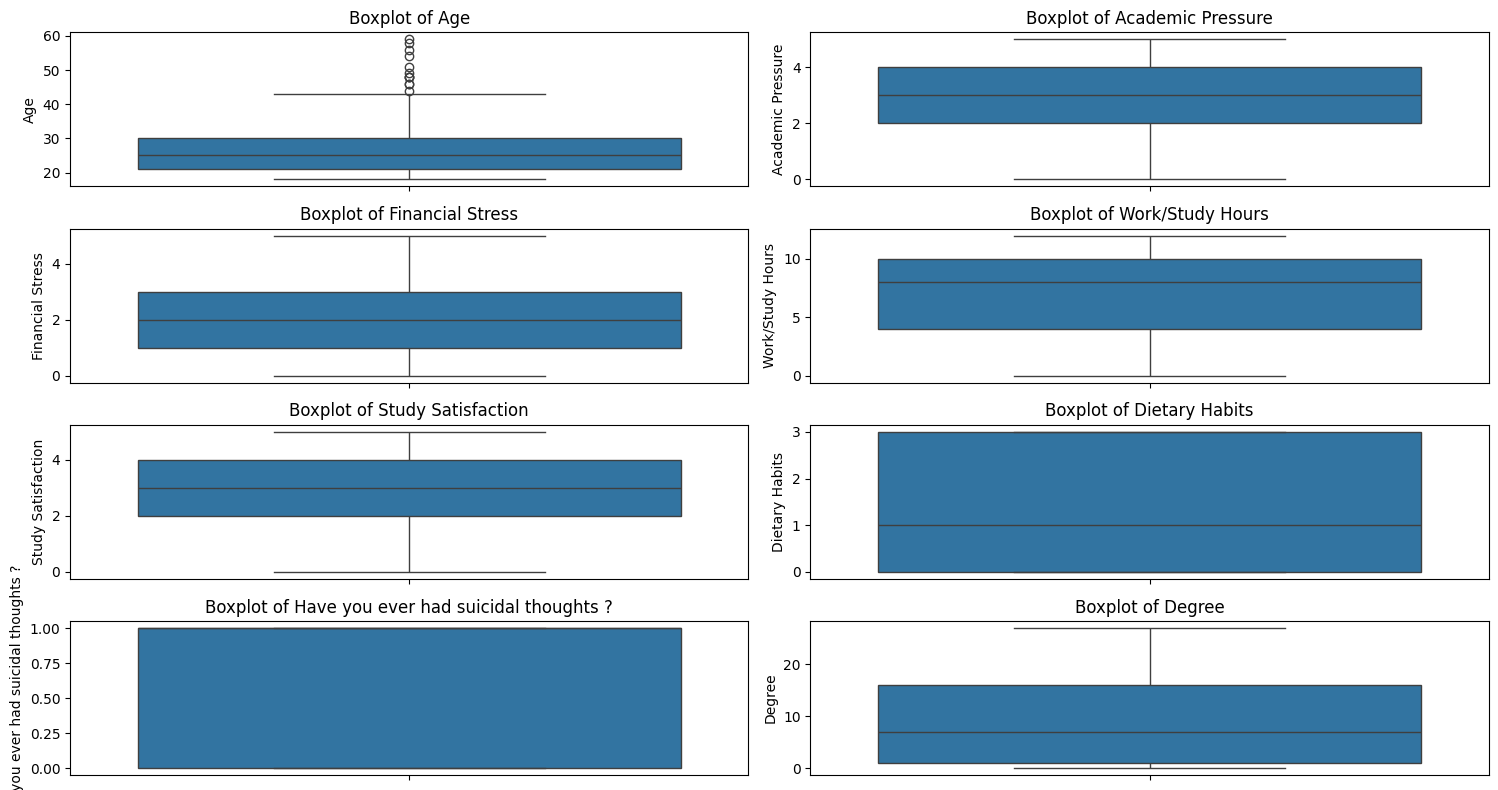

In [21]:
# List of numeric features to check
features_to_check = [
    'Age', 'Academic Pressure', 'Financial Stress',
    'Work/Study Hours', 'Study Satisfaction', 'Dietary Habits',
    'Have you ever had suicidal thoughts ?', 'Degree'
]

# Boxplot visualization
plt.figure(figsize=(15, 8))
for i, col in enumerate(features_to_check):
    plt.subplot(4, 2, i+1)
    sns.boxplot(y=df_encoded[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**Boxplot Interpretation**  
**1. `Age` – Outliers Detected**

* **Boxplot Insight**: The plot shows several dots above the upper whisker, indicating outliers — these are students with ages significantly higher than the typical range.
* **Context**: Most students are between **18 and 35 years old**, but a few records show ages above **45 or even 50**, which are flagged as outliers.


**2. `Academic Pressure`, `Financial Stress`, `Work/Study Hours`, `Study Satisfaction`, `Dietary Habits`**

* **No outliers detected** by the IQR method.
* **Boxplot Observation**:

  * The distributions are compact and well-contained within the whiskers.
  * No extreme values are present.
* **Conclusion**: These features are clean and can proceed to scaling and modeling without needing outlier handling.


**3. `Have you ever had suicidal thoughts ?`**

* This is a **binary variable** with only two values: `Yes` (1) or `No` (0).
* **Boxplot shows only two levels**, which is expected.
* **Outliers are not applicable** for binary features.


**4. `Degree`**

* Although this feature appears numeric, it was originally **categorical and label encoded**.
* **No outliers detected**, and values are discrete.


**Summary**

* The only feature with true outliers is `Age`.
* All other key features are clean and safe to use for modeling.
* You may:

  * Apply outlier handling to `Age` (e.g., clip to max age = 45)
  * Proceed with full preprocessing: encoding, scaling, and saving the processed dataset

# **5. Data Preprocessing**

In [22]:
df_processed = df.copy()

## Drop Unused Columns

In [23]:
df_processed.drop(columns=['id'], inplace=True)

In [24]:
df_processed.describe(include='all')

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


## Outlier Handling for Age

In [27]:
Q1 = df_processed['Age'].quantile(0.25)
Q3 = df_processed['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_processed['Age'] = df_processed['Age'].clip(lower=lower_bound, upper=upper_bound)

## Encoding Categorical Data

In [28]:
label_enc = LabelEncoder()
for col in df_processed.select_dtypes(include='object').columns:
    df_processed[col] = label_enc.fit_transform(df_processed[col])

## Feature Scaling

In [29]:
X = df_processed.drop(columns=['Depression'])
y = df_processed['Depression']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split Data 80:20

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## Export Data to CSV

In [31]:
df_final = pd.DataFrame(X_scaled, columns=X.columns)
df_final['Depression'] = y.values

df_final.to_csv("student_depression_processed.csv", index=False)

print("✅ Preprocessing complete. File saved as 'student_depression_processed.csv'")

✅ Preprocessing complete. File saved as 'student_depression_processed.csv'
